### Welcome to my Notebook !!

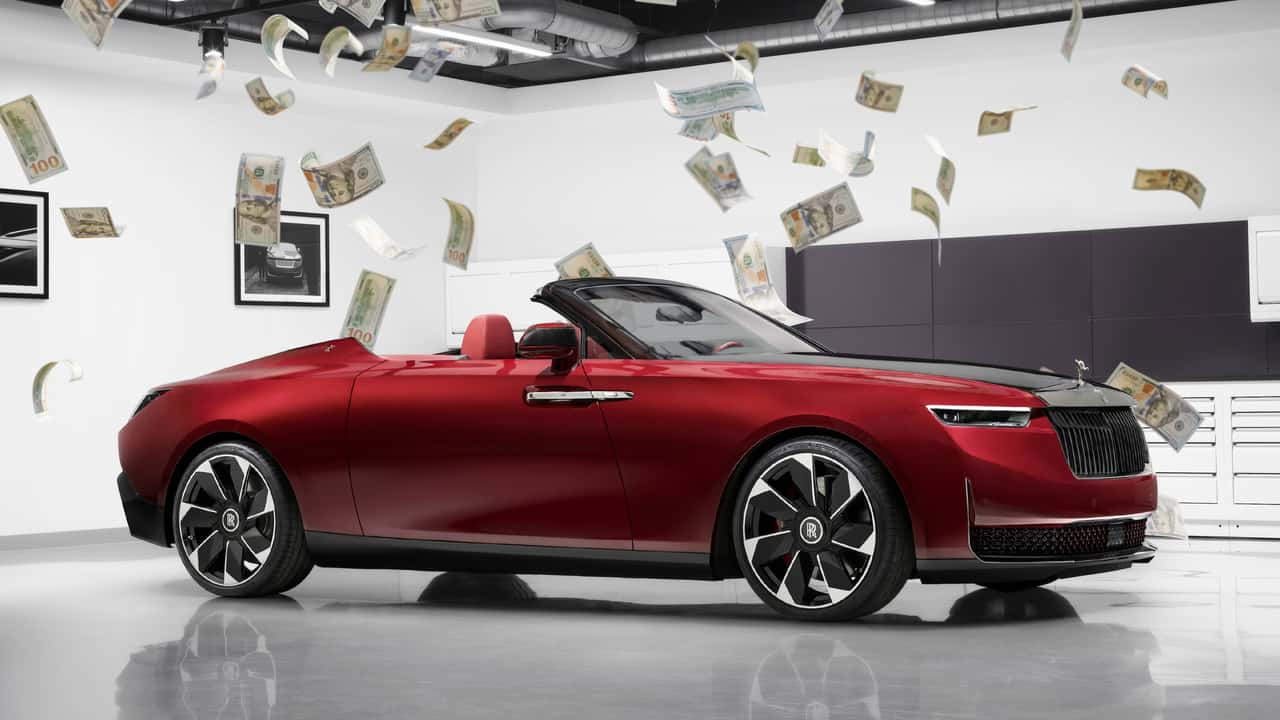

### The objective of this project is to predict Car Selling Price 💰🚗

### Import Relevant Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
train_df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

### Basic Understanding of Data

In [3]:
train_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
train_df.shape

(4340, 8)

In [5]:
train_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
train_df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
train_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
train_df.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Exploratory Data Analysis (EDA) and Feature Engineering

In [10]:
data = train_df.copy()

In [11]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
# Car name Analysis
# Check unique values and their counts
top_10_car_name = data['name'].value_counts().head(10)
print(f"Number of unique car names: {data['name'].nunique()}")
print("Top 10 car names and their counts:")
print(top_10_car_name)

Number of unique car names: 1491
Top 10 car names and their counts:
name
Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Name: count, dtype: int64


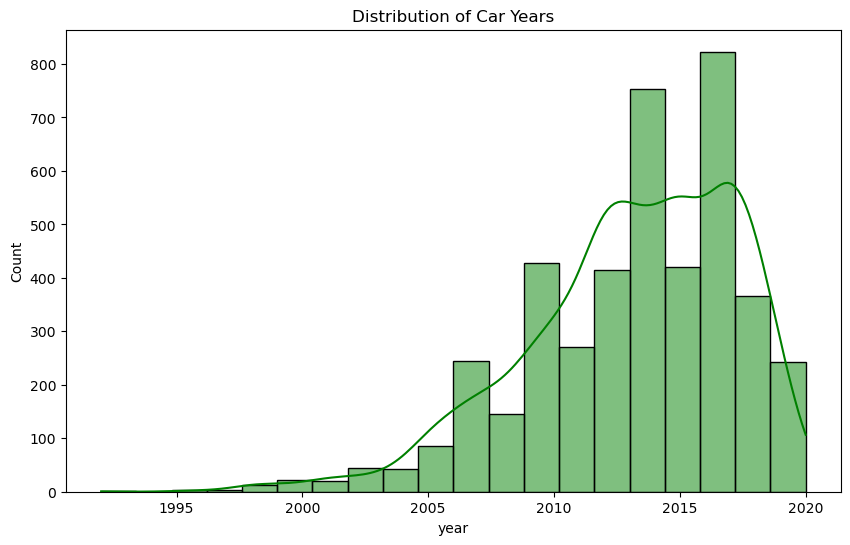

In [13]:
# year Analysis
# Check the distribution of car years
plt.figure(figsize=(10, 6))
sns.histplot(data['year'], bins=20, kde=True, color='g')
plt.title('Distribution of Car Years')
plt.show()

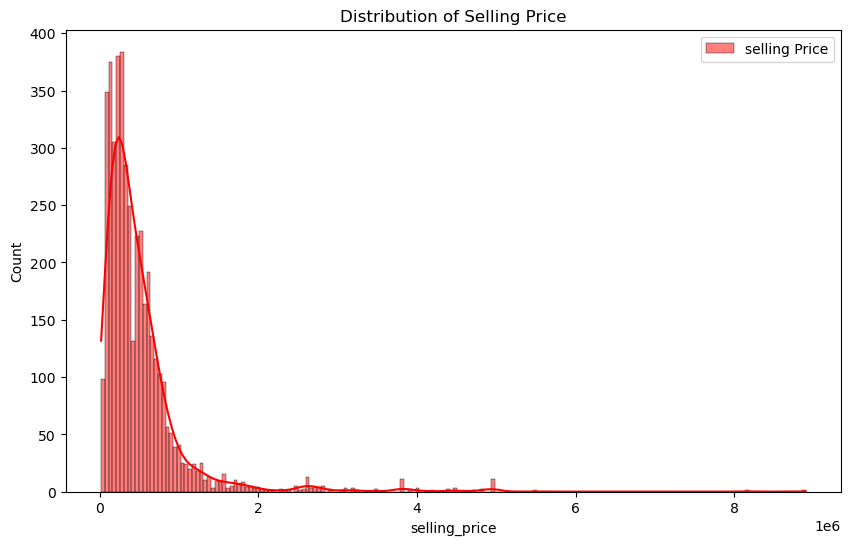

In [14]:
# selling_Price Analysis
# Analyze the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True, label='selling Price', color='r')
plt.title('Distribution of Selling Price')
plt.legend()
plt.show()

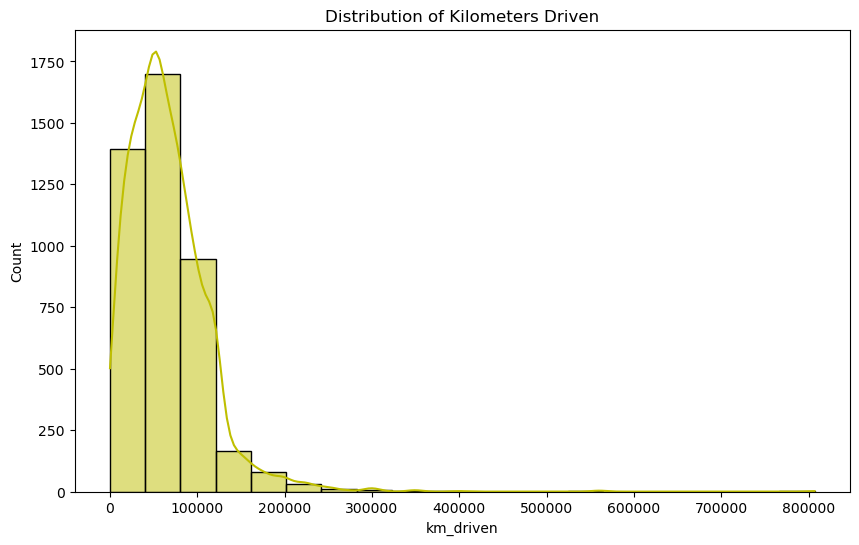

In [15]:
# km_Driven Analysis
# Analyze the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(data['km_driven'], bins=20, kde=True, color='y')
plt.title('Distribution of Kilometers Driven')
plt.show()

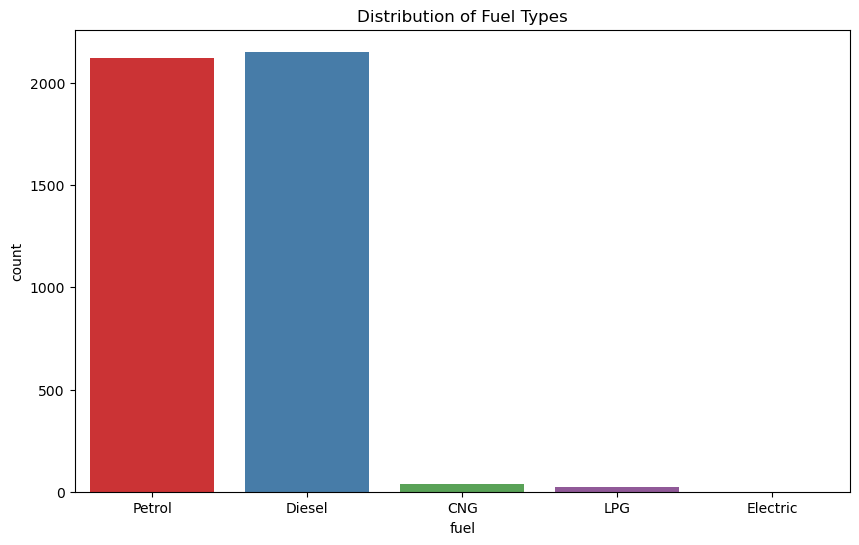

In [16]:
# fuel_Type Analysis
# Check the distribution of fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=data, palette='Set1')
plt.title('Distribution of Fuel Types')
plt.show()

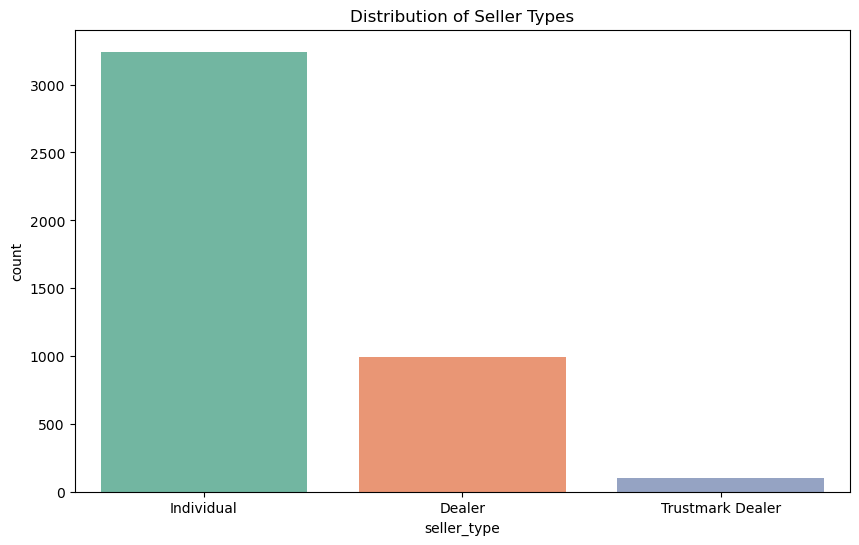

In [17]:
# seller_Type Analysis
# Explore the distribution of seller types
plt.figure(figsize=(10, 6))
sns.countplot(x='seller_type', data=data, palette='Set2')
plt.title('Distribution of Seller Types')
plt.show()

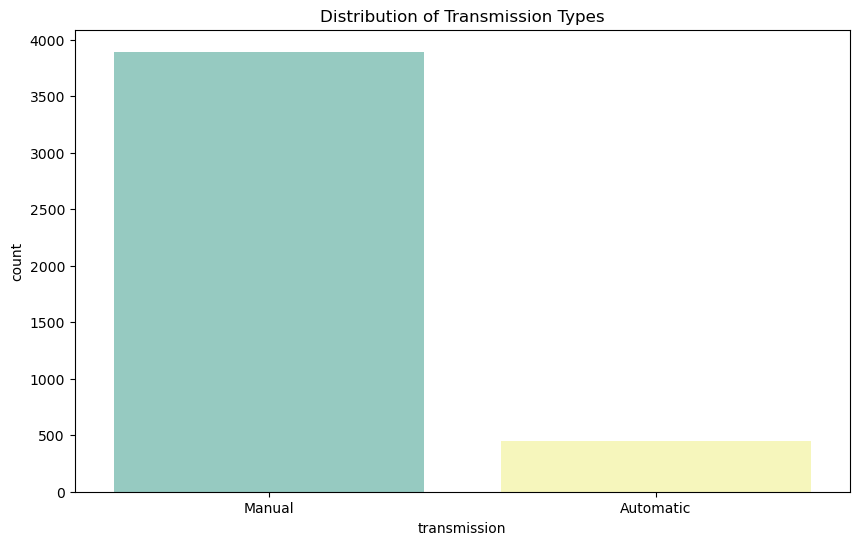

In [18]:
# transmission Analysis
# Check the distribution of transmission types
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=data, palette='Set3')
plt.title('Distribution of Transmission Types')
plt.show()

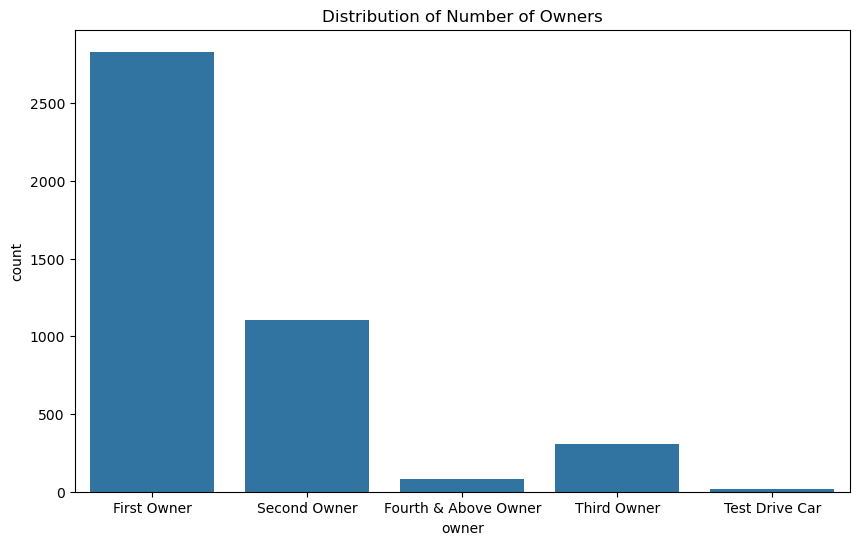

In [19]:
# owner Analysis
# Explore the distribution of the number of owners
plt.figure(figsize=(10, 6))
sns.countplot(x='owner', data=data)
plt.title('Distribution of Number of Owners')
plt.show() 

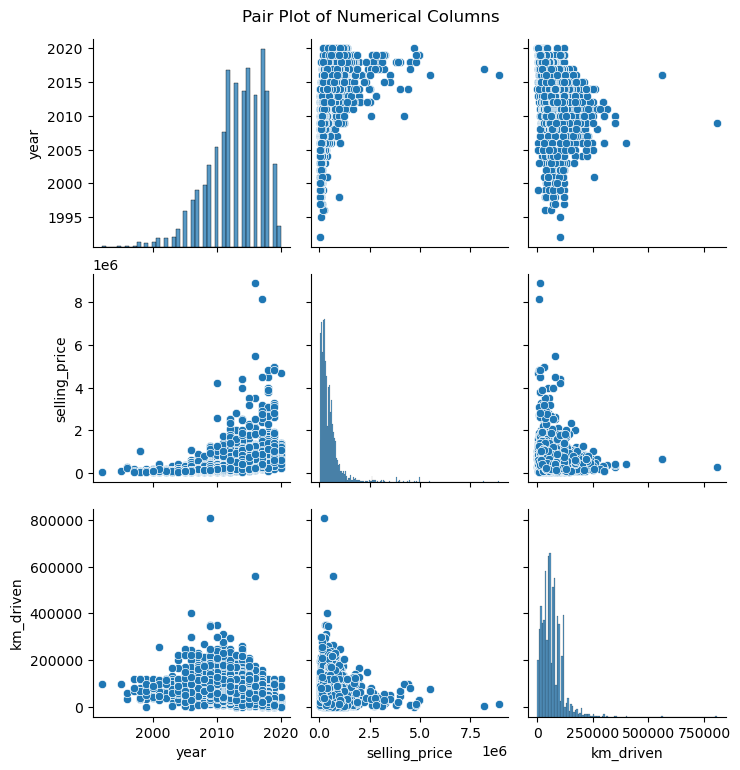

In [20]:
# Pair plot for numerical columns
sns.pairplot(data)
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

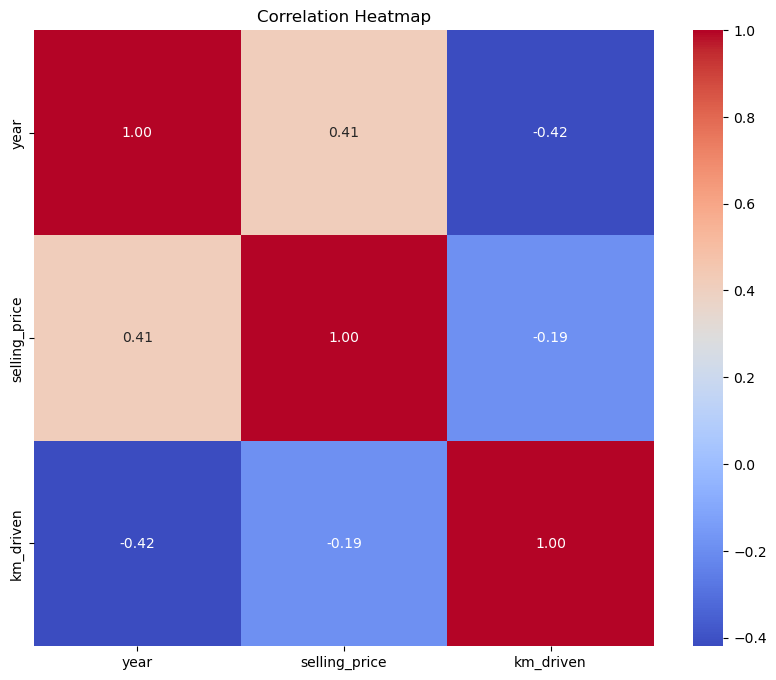

In [21]:
# Exclude non-numeric columns before creating the correlation heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [22]:
# Feature Engineering
from datetime import datetime
current_year = datetime.now().year

# Creating a new feature 'age'
data['age'] = current_year - data['year']

In [23]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10


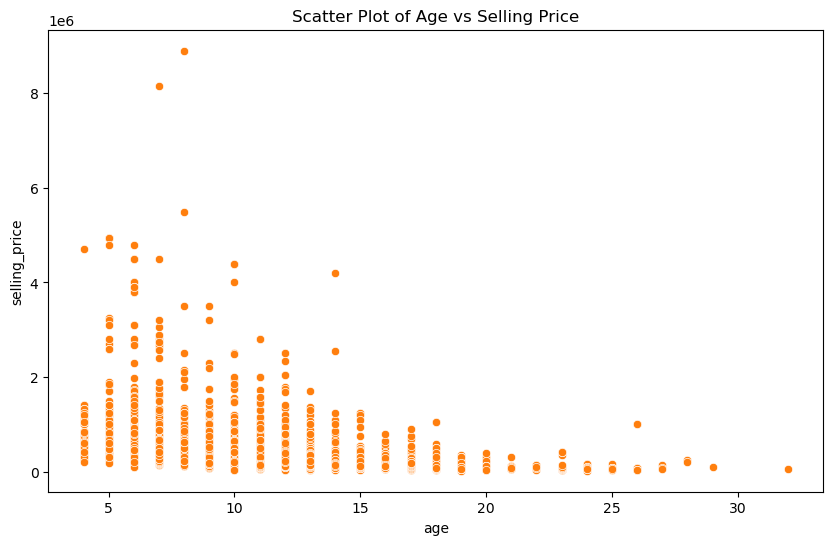

In [24]:
# Scatter plot for Age vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='selling_price', data=data, color = 'C1')
plt.title('Scatter Plot of Age vs Selling Price')
plt.show()

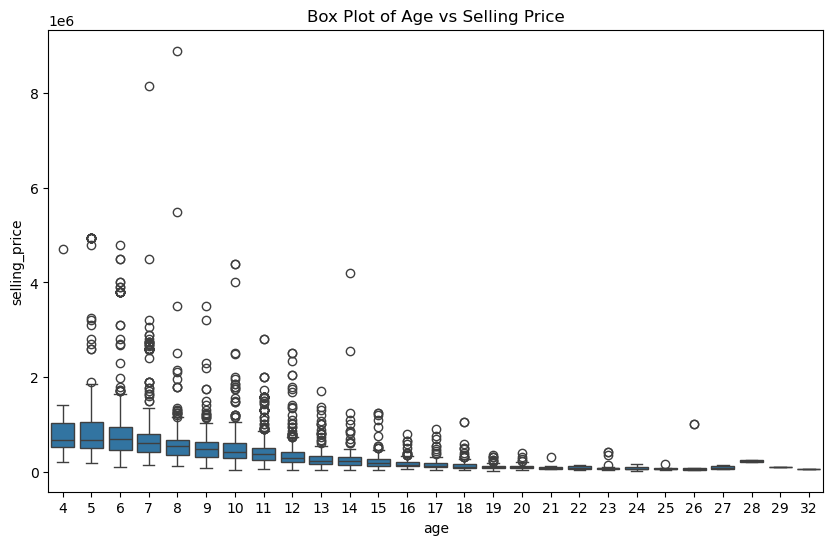

In [25]:
# Box plot for Age vs Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='selling_price', data=data)
plt.title('Box Plot of Age vs Selling Price')
plt.show() 

In [26]:
# Odometer Reading in Thousands
data['km_driven_thousands'] = data['km_driven'] / 1000

In [27]:
# Vehicle Brand
data['brand'] = data['name'].str.split().str[0]

In [28]:
# Vehicle Usage (km_driven per Year)
data['km_per_year'] = data['km_driven'] / data['age']

In [29]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,km_driven_thousands,brand,km_per_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,17,70.0,Maruti,4117.647059
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,17,50.0,Maruti,2941.176471
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,12,100.0,Hyundai,8333.333333
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,7,46.0,Datsun,6571.428571
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10,141.0,Honda,14100.000000


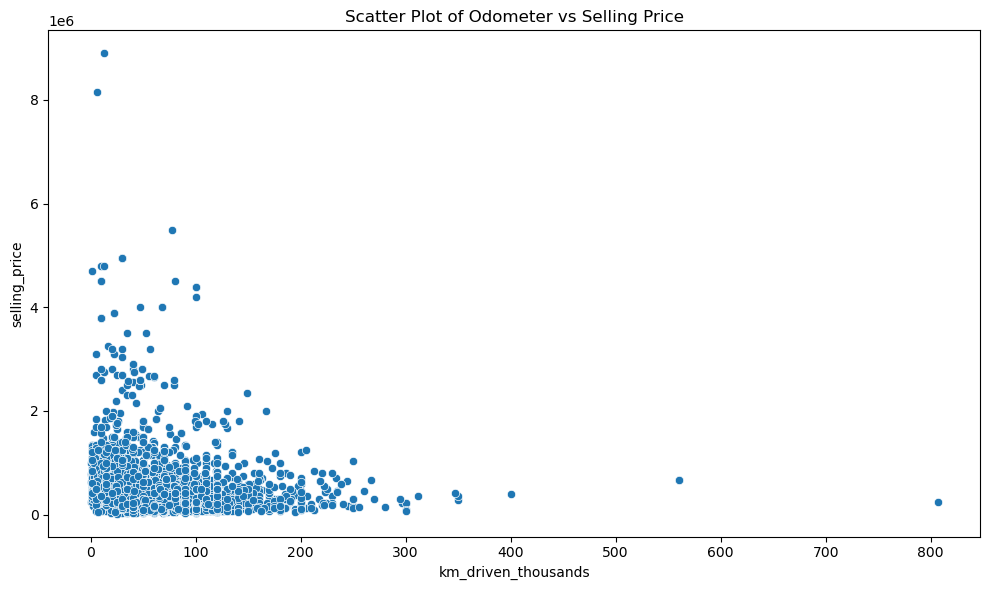

In [30]:
# Scatter plot for Odometer Reading in Thousands
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven_thousands', y='selling_price', data=data, palette='Set1')
plt.title('Scatter Plot of Odometer vs Selling Price')
plt.tight_layout()
plt.show()

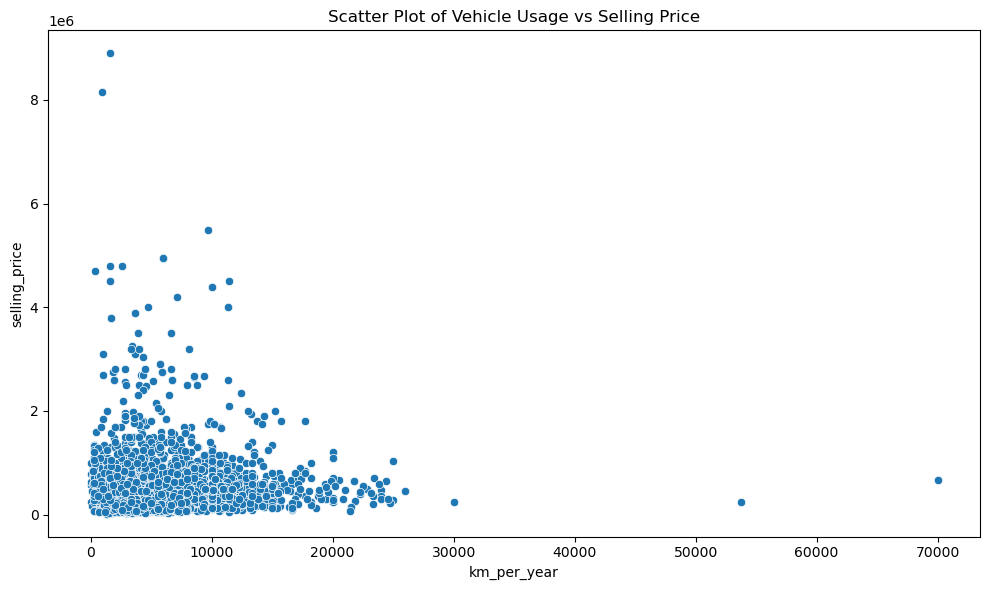

In [31]:
# Scatter plot for Vehicle Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_per_year', y='selling_price', data=data, palette='Set3')
plt.title('Scatter Plot of Vehicle Usage vs Selling Price')
plt.tight_layout()
plt.show() 

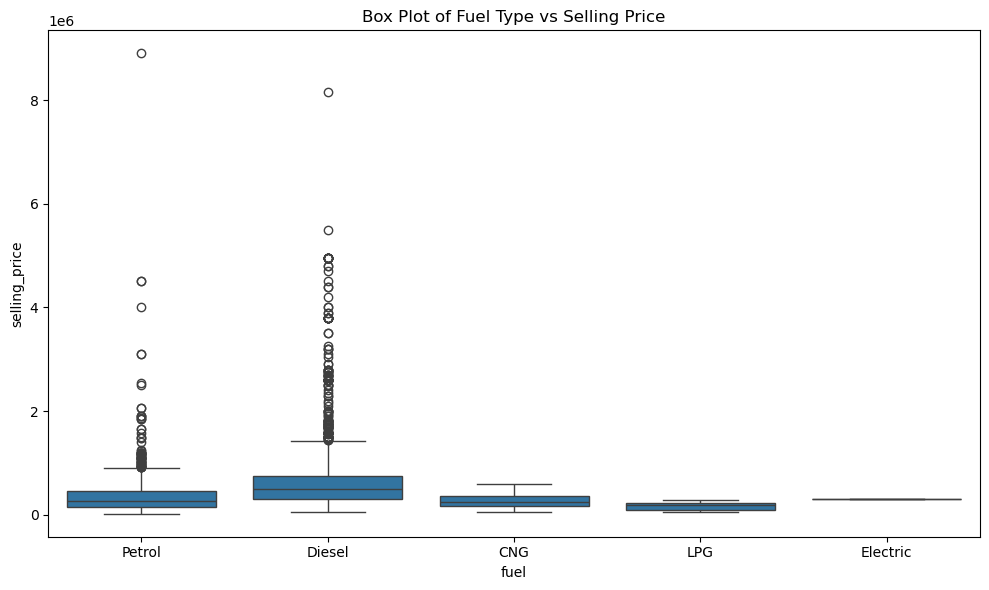

In [32]:
# Box plot for Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=data)
plt.title('Box Plot of Fuel Type vs Selling Price')
plt.tight_layout()
plt.show() 

### Data Pre-processing or Cleaning

In [33]:
# Checking Duplicates Data

In [34]:
data.duplicated().sum()

763

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.duplicated().sum()

0

In [37]:
# Checking Cardinality of Categorical features

In [38]:
data.select_dtypes(include='object').nunique()

name            1491
fuel               5
seller_type        3
transmission       2
owner              5
brand             29
dtype: int64

### Lets deal with missing values

In [39]:
data.isnull().sum()

name                   0
year                   0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
age                    0
km_driven_thousands    0
brand                  0
km_per_year            0
dtype: int64

In [40]:
# So, no missing value

In [41]:
# Checking Total Number & Percentage of Missing Values in Training Dataset

In [42]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)

In [43]:
df

,Number of Missing Values,% of Missing Values


In [44]:
# Visualizing Missing Numbers

In [45]:
import missingno as msno

<Axes: >

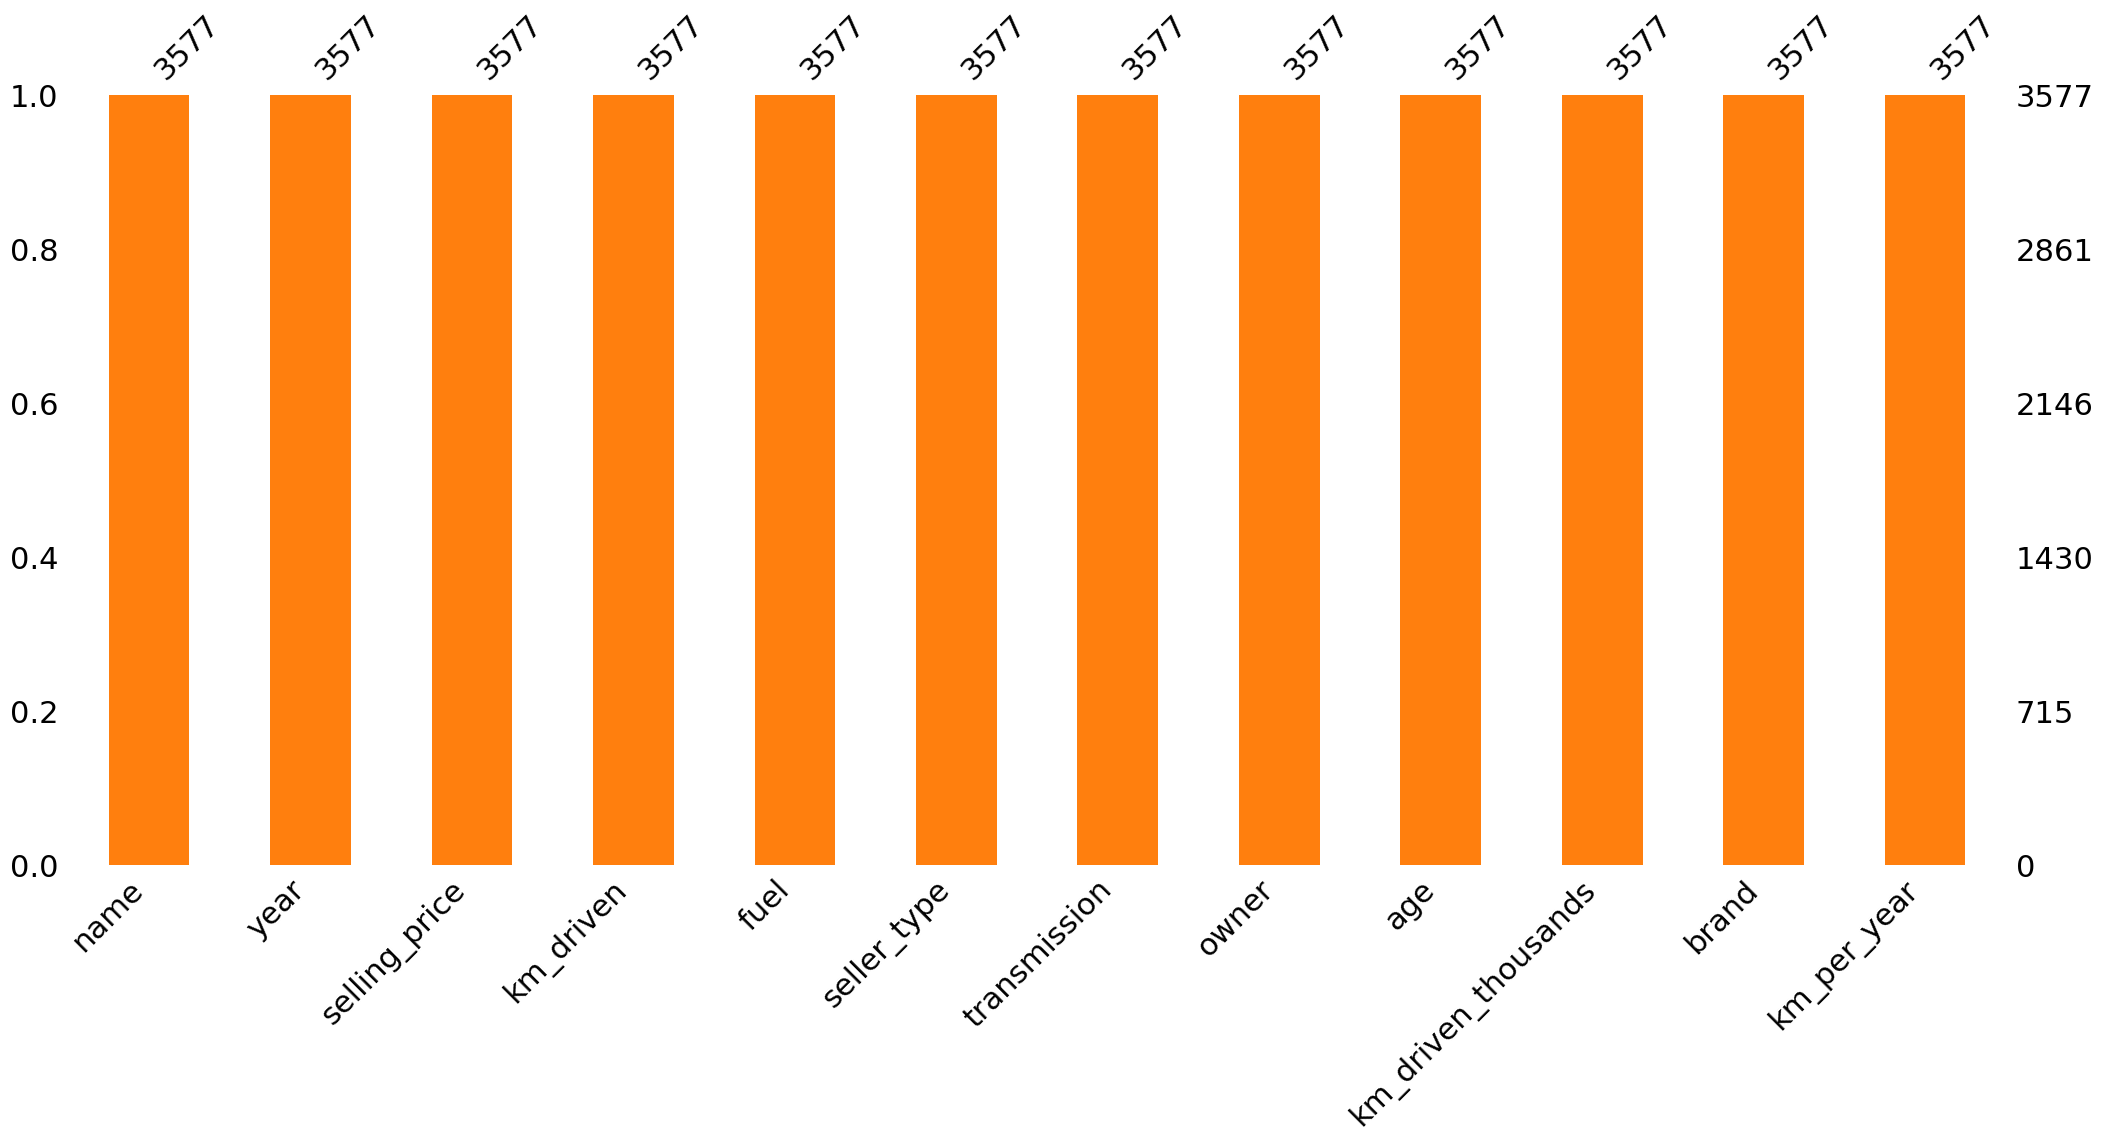

In [46]:
msno.bar(data, color='C1', fontsize=22)

In [47]:
# Another way to visualize missing Values

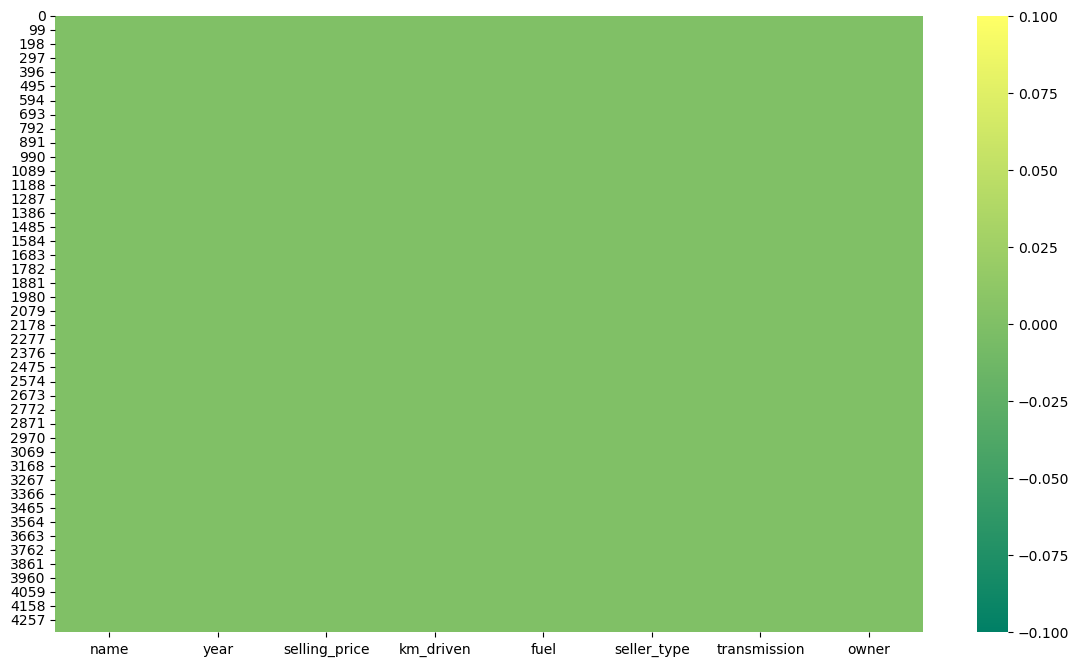

In [48]:
plt.figure(figsize=(14, 8))
sns.heatmap(train_df.isnull(), cmap='summer')
plt.show()

### Feature Encoding

In [49]:
# For Nominal data(have No order)  ==> One hot encoding
# For Ordinal data(have order) ==> Label enconding

In [50]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [51]:
cat_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']

In [52]:
num_cols

['year',
 'selling_price',
 'km_driven',
 'age',
 'km_driven_thousands',
 'km_per_year']

In [53]:
data.dtypes

name                    object
year                     int64
selling_price            int64
km_driven                int64
fuel                    object
seller_type             object
transmission            object
owner                   object
age                      int64
km_driven_thousands    float64
brand                   object
km_per_year            float64
dtype: object

In [54]:
data['name'].nunique()  # Target guided encoding

1491

In [55]:
data['fuel'].nunique()  # Label encoding

5

In [56]:
data['seller_type'].nunique() # Label encoding

3

In [57]:
data['transmission'].nunique() # Label encoding

2

In [58]:
data['owner'].nunique() # Label encoding

5

In [59]:
data['brand'].nunique()   # Target guided encoding

29

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:  # Label Encoding
    data[col] = le.fit_transform(data[col])

In [62]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [63]:
target_guided_encoding('name', 'selling_price')

In [64]:
target_guided_encoding('brand', 'selling_price')

In [65]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,km_driven_thousands,brand,km_per_year
0,94,2007,60000,70000,4,1,1,0,17,70.0,7,4117.647059
1,183,2007,135000,50000,4,1,1,0,17,50.0,7,2941.176471
2,864,2012,600000,100000,1,1,1,0,12,100.0,10,8333.333333
3,345,2017,250000,46000,4,1,1,0,7,46.0,6,6571.428571
4,934,2014,450000,141000,1,1,1,2,10,141.0,14,14100.000000


In [66]:
data.dtypes

name                     int64
year                     int64
selling_price            int64
km_driven                int64
fuel                     int32
seller_type              int32
transmission             int32
owner                    int32
age                      int64
km_driven_thousands    float64
brand                    int64
km_per_year            float64
dtype: object

### Lets Perform outlier detection !

In [67]:
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

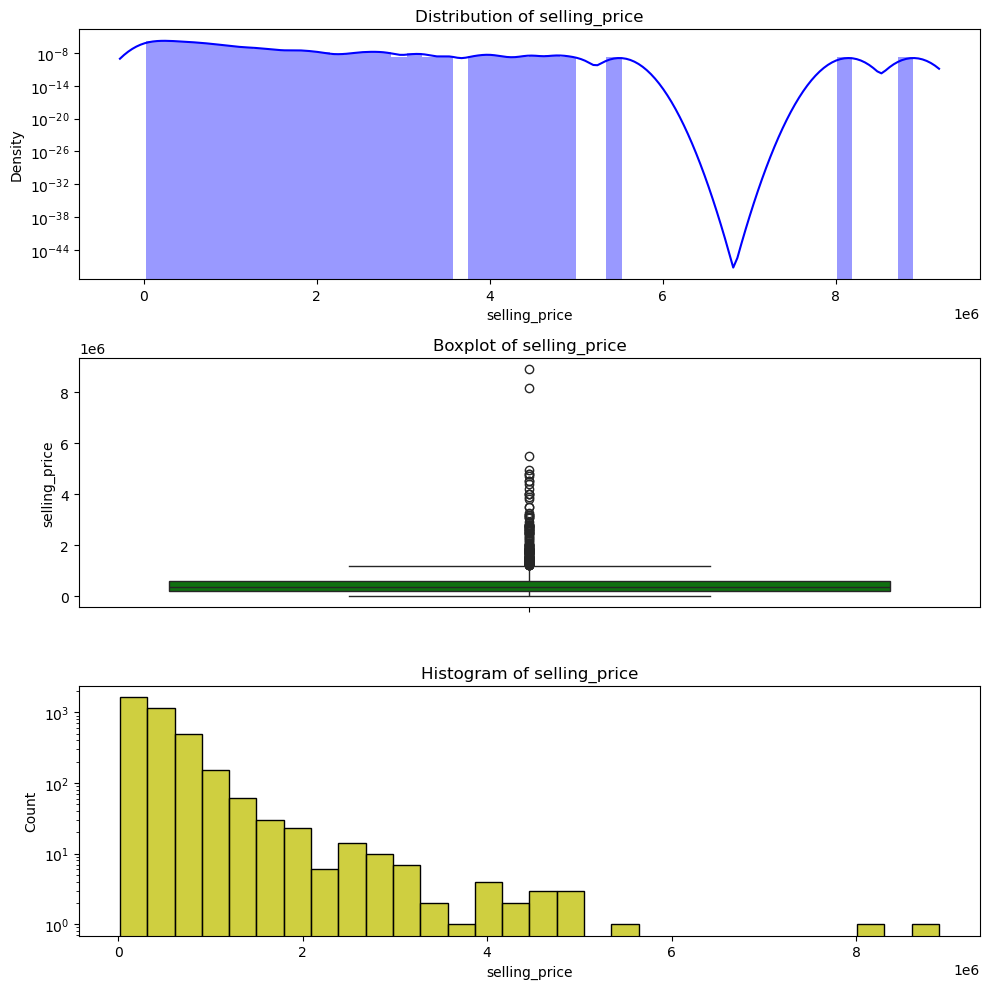

In [68]:
plot(data, 'selling_price')

In [69]:
q1 = data['selling_price'].quantile(0.25)
q3 = data['selling_price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [70]:
maximum

1200000.0

In [71]:
minimum

-400000.0

In [72]:
len([x for x in data['selling_price'] if x> maximum or x<minimum] )

170

### How to deal with Outlier

In [73]:
### wherever I have price >=20 just replace replace it with median of Price
data['selling_price'] = np.where(data['selling_price']>=20 , data['selling_price'].median() , data['selling_price'])

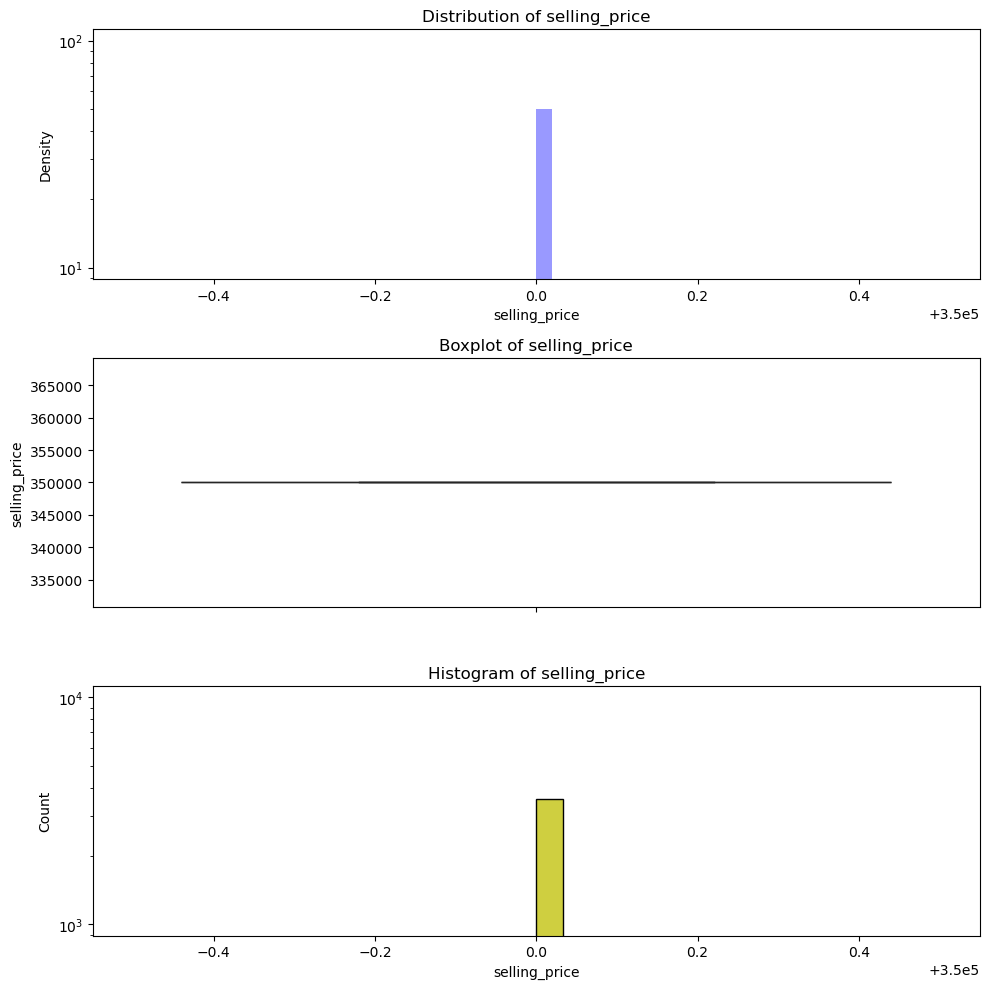

In [74]:
plot(data, 'selling_price')

### Lets Perform feature selection

In [75]:
X = data.drop(['selling_price'] , axis=1)

In [76]:
y = data['selling_price']

In [77]:
from sklearn.feature_selection import mutual_info_regression

In [78]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,km_driven_thousands,brand,km_per_year
0,94,2007,350000.0,70000,4,1,1,0,17,70.0,7,4117.647059
1,183,2007,350000.0,50000,4,1,1,0,17,50.0,7,2941.176471
2,864,2012,350000.0,100000,1,1,1,0,12,100.0,10,8333.333333
3,345,2017,350000.0,46000,4,1,1,0,7,46.0,6,6571.428571
4,934,2014,350000.0,141000,1,1,1,2,10,141.0,14,14100.000000


In [79]:
imp = mutual_info_regression(X, y)

In [80]:
imp

array([0.00678395, 0.02407882, 0.        , 0.        , 0.        ,
       0.00161337, 0.00742235, 0.02303787, 0.        , 0.0178163 ,
       0.        ])

In [81]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [82]:
imp_df

,0
name,0.006784
year,0.024079
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.001613
owner,0.007422
age,0.023038
km_driven_thousands,0.000000
brand,0.017816


In [83]:
imp_df.columns = ['importance']

In [84]:
imp_df

,importance
name,0.006784
year,0.024079
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.001613
owner,0.007422
age,0.023038
km_driven_thousands,0.000000
brand,0.017816


In [85]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
year,0.024079
age,0.023038
brand,0.017816
owner,0.007422
name,0.006784
transmission,0.001613
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
km_driven_thousands,0.000000


In [86]:
# Filter the DataFrame to get only the rows where 'importance' is 0
zero_importance_features = imp_df.loc[imp_df['importance'] == 0].index.tolist()

In [87]:
zero_importance_features

['km_driven', 'fuel', 'seller_type', 'km_driven_thousands', 'km_per_year']

In [88]:
X.drop(zero_importance_features, axis=1, inplace=True)

In [89]:
X.shape

(3577, 6)

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
X_scaled

array([[-1.42008063, -1.40256584,  0.30912612, -0.70888558,  1.40256584,
        -0.65278176],
       [-1.20347874, -1.40256584,  0.30912612, -0.70888558,  1.40256584,
        -0.65278176],
       [ 0.45389083, -0.22641758,  0.30912612, -0.70888558,  0.22641758,
        -0.02514973],
       ...,
       [-1.47118895, -0.93210654,  0.30912612,  0.85731808,  0.93210654,
        -0.65278176],
       [ 1.66832169,  0.71450103,  0.30912612, -0.70888558, -0.71450103,
        -0.02514973],
       [-0.51229965,  0.71450103,  0.30912612, -0.70888558, -0.71450103,
        -0.23436041]])

### Lets Build ML model

### split dataset into train & test

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Splitting Data For Model Which Don't Need Scaled Data.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
X_train.shape

(2682, 6)

In [96]:
X_test.shape

(895, 6)

In [97]:
y_train.shape

(2682,)

In [98]:
y_test.shape

(895,)

In [99]:
# Splitting Data For Model Which Need Scaled Data.

In [100]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [101]:
X_train1.shape

(2682, 6)

In [102]:
X_test1.shape

(895, 6)

In [103]:
y_train1.shape

(2682,)

In [104]:
y_test1.shape

(895,)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
ml_model = RandomForestRegressor()

In [107]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [108]:
y_pred = ml_model.predict(X_test)

In [109]:
y_pred

array([350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 3500

In [110]:
from sklearn import metrics

In [111]:
metrics.r2_score(y_test , y_pred)

1.0

### How to automate ml pipeline & How to define your Evaluation metric..

### How to automate ml pipeline & How to define your Evaluation metric..

In [112]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   

In [113]:
mape(y_test, y_pred)

0.0

### How to automate ml pipeline !

### Model Building For Scaled Data

In [114]:
evaluation_results = []

In [115]:
# If you are using LogisticRegression for a regression problem, it will not work because logistic
# regression is a classification algorithm and is not designed for predicting continuous values.

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()  

In [116]:
# 1. Linear Regression Model

In [117]:
from sklearn.linear_model import LinearRegression

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


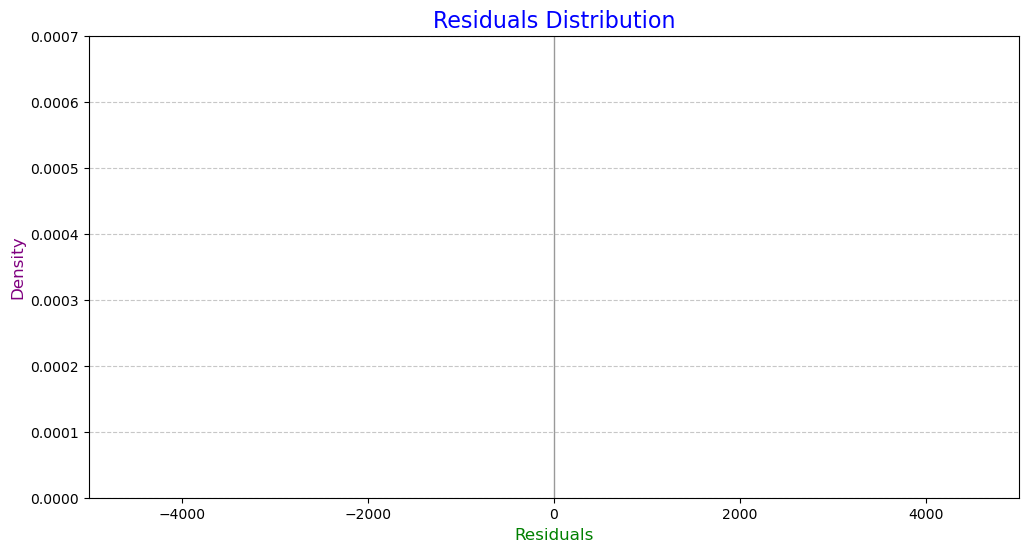

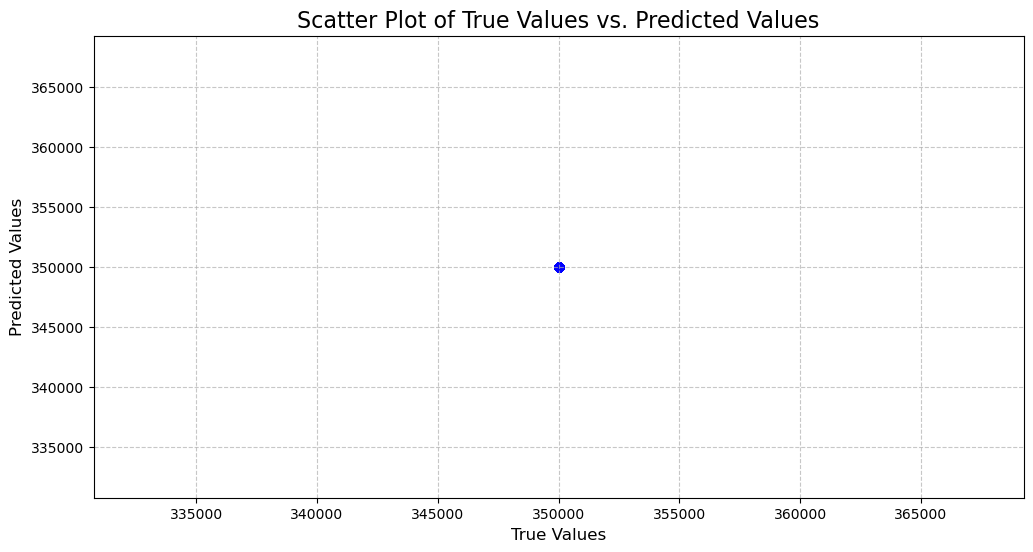

In [118]:
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train1, y_train1, X_test1, y_test1)

In [119]:
# 2.SVM Model 

In [120]:
from sklearn.svm import SVR

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


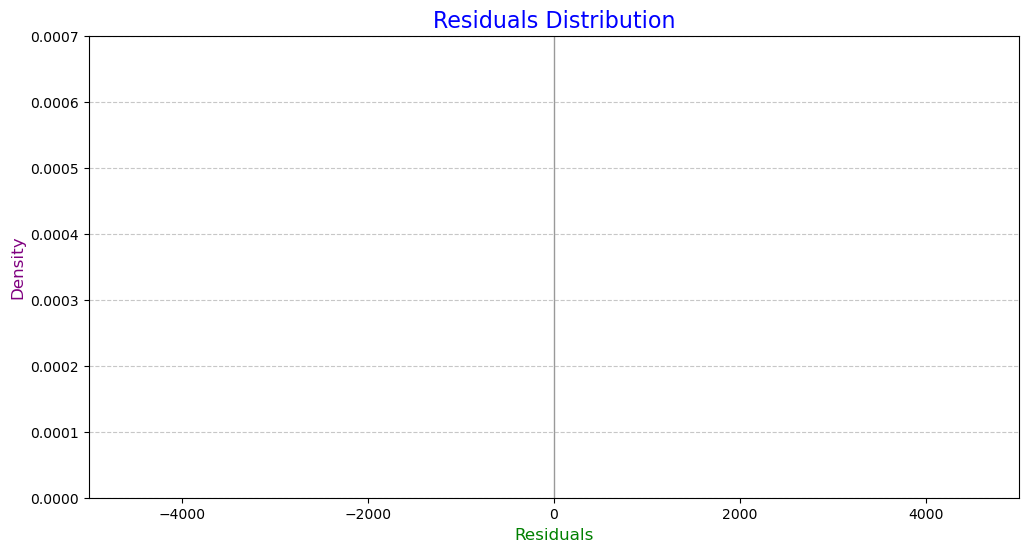

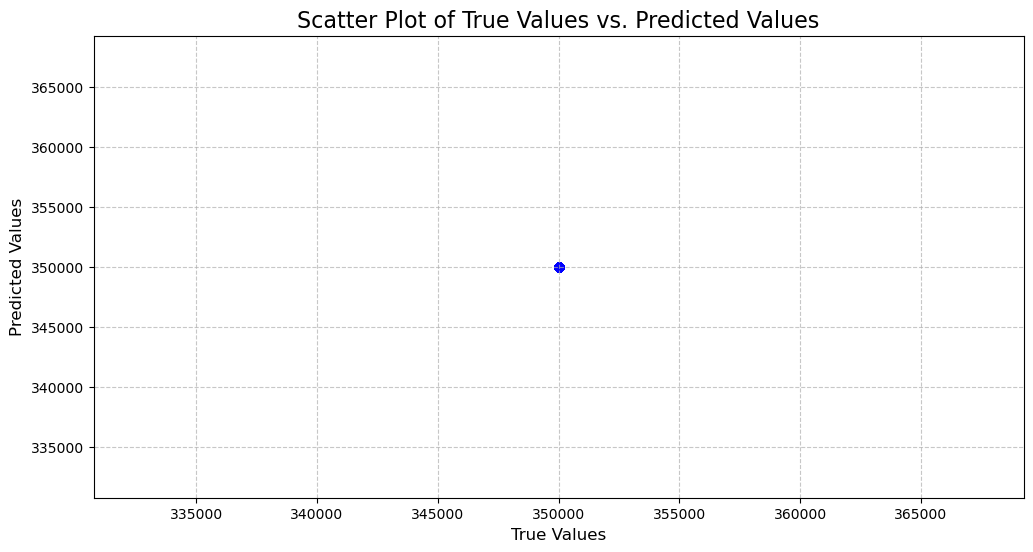

In [121]:
evaluate_model_regression(SVR(), 'SVM', X_train1, y_train1, X_test1, y_test1)

### Model Building For UnScaled Data

In [122]:
# If you are using LogisticRegression for a regression problem, it will not work because logistic
# regression is a classification algorithm and is not designed for predicting continuous values.
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()  

In [123]:
# 3. Decision Tree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


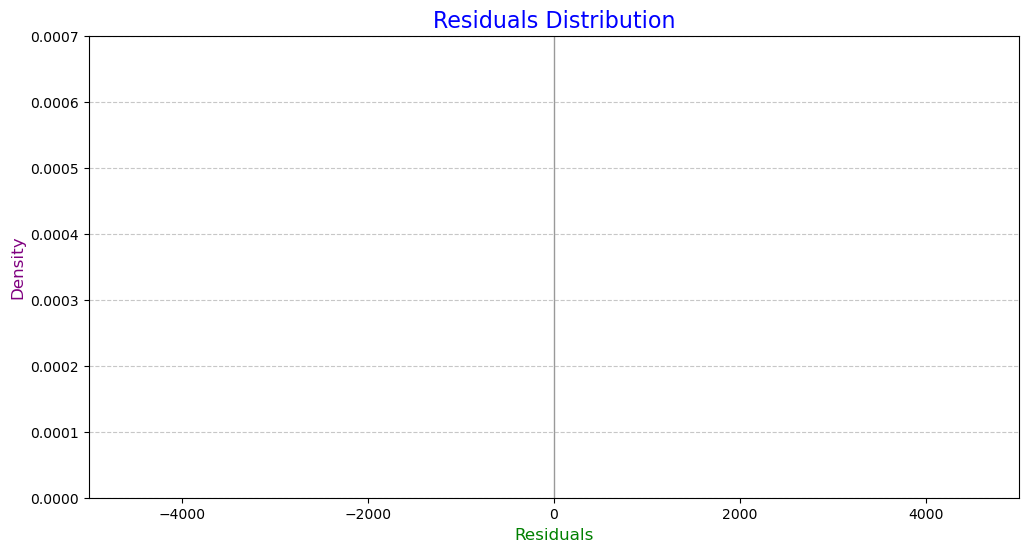

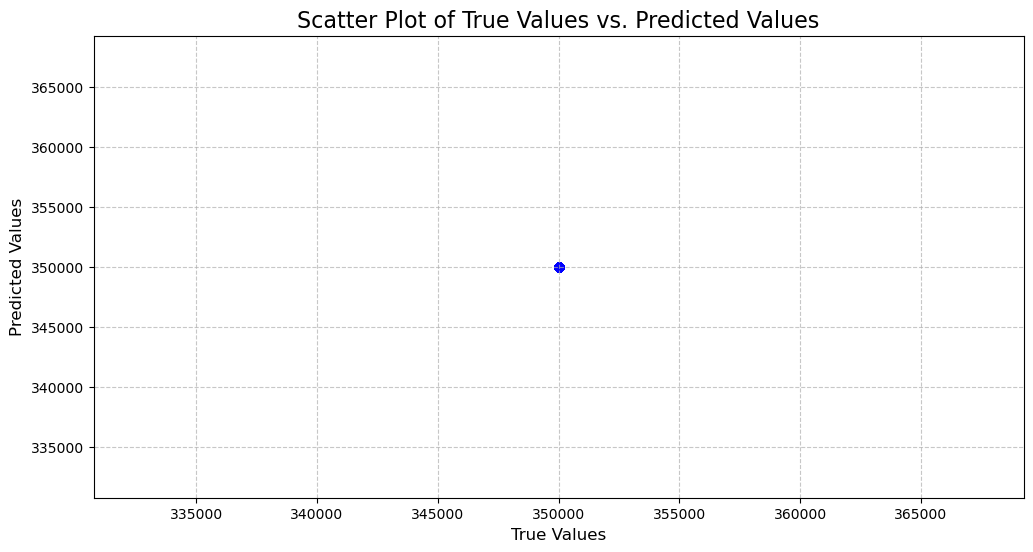

In [125]:
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [126]:
# 4. Random Forest Regressor Model

In [127]:
from sklearn.ensemble import RandomForestRegressor

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


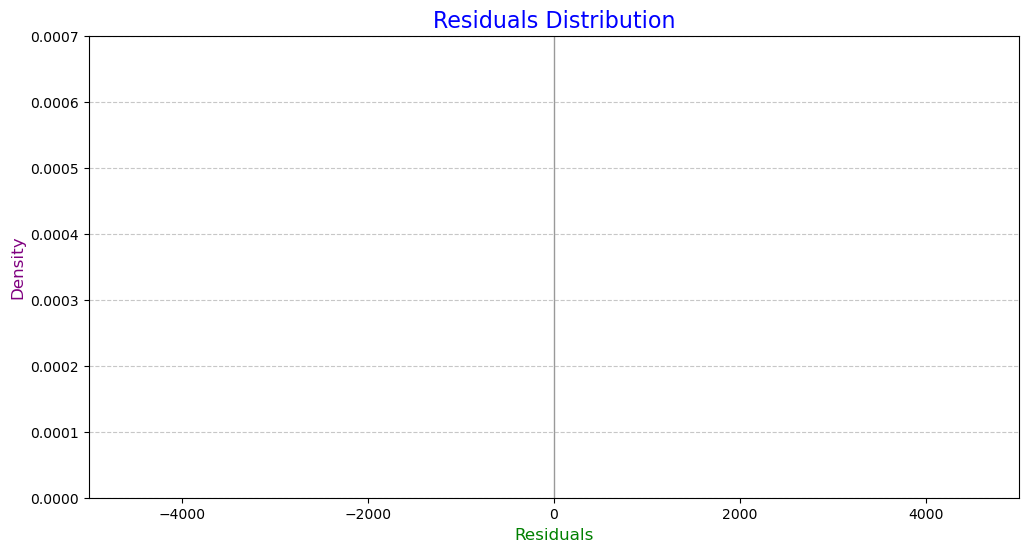

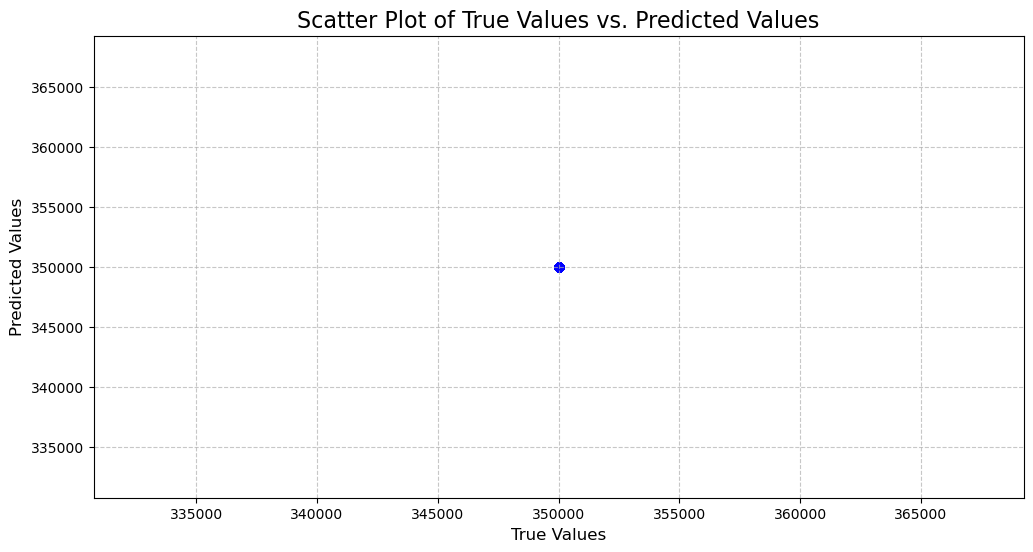

In [128]:
evaluate_model_regression(RandomForestRegressor(), 'Random Forest', X_train, y_train, X_test, y_test)

In [129]:
# 5. XG Boost Regressor Model

In [130]:
from xgboost import XGBRegressor

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


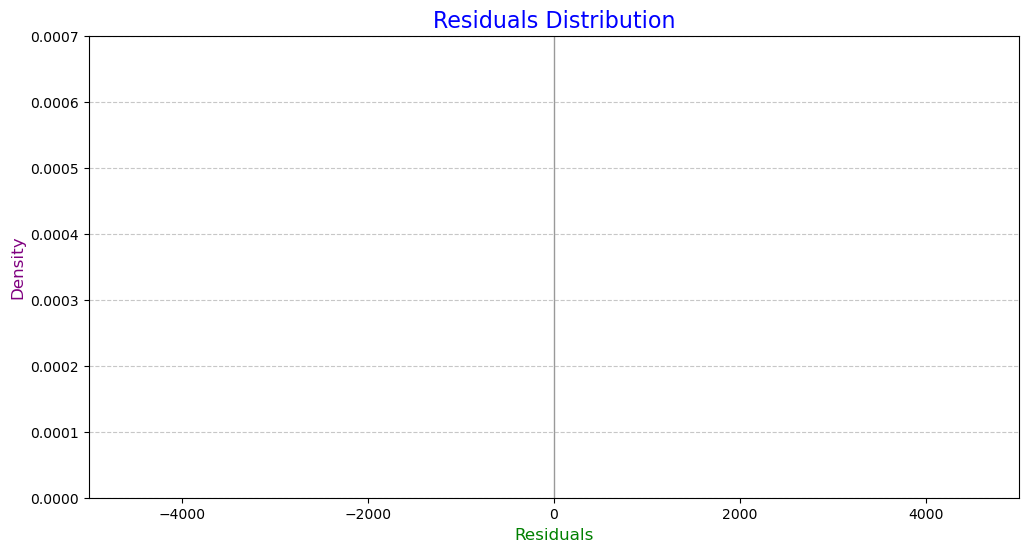

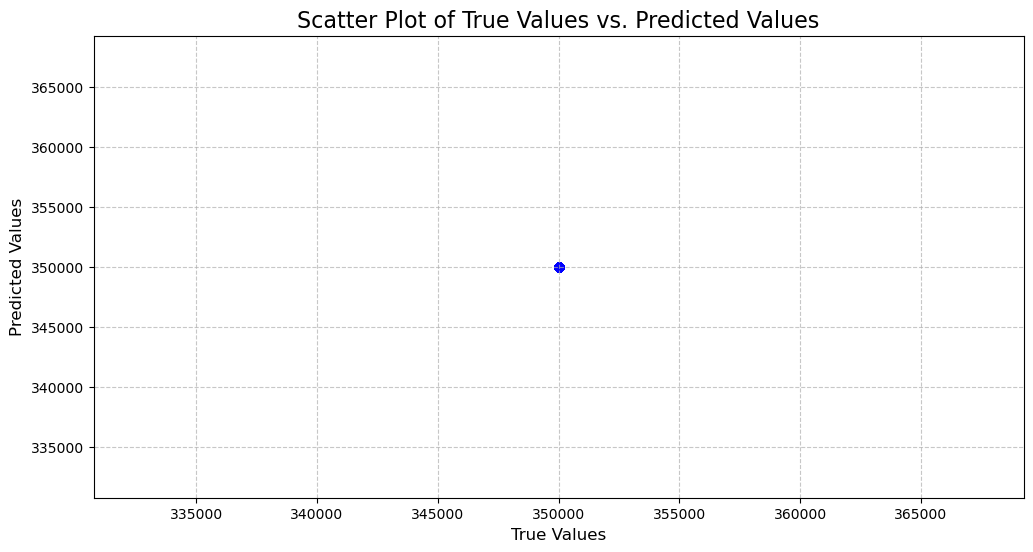

In [131]:
evaluate_model_regression(XGBRegressor(), 'XG Boost', X_train, y_train, X_test, y_test)

In [132]:
# 6. LGBM Model

In [133]:
from lightgbm import LGBMRegressor

Training score : 1.0
Testing score : 1.0
R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0


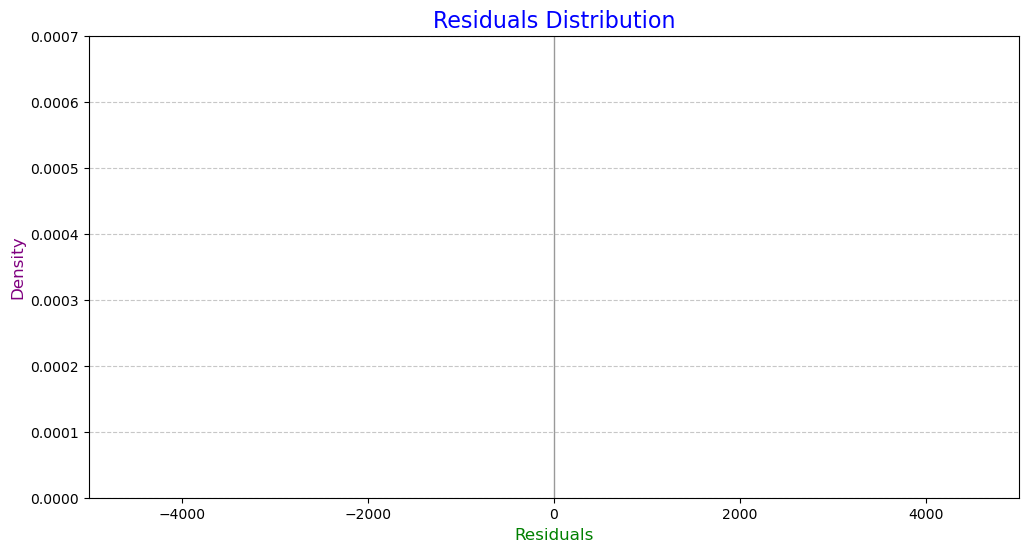

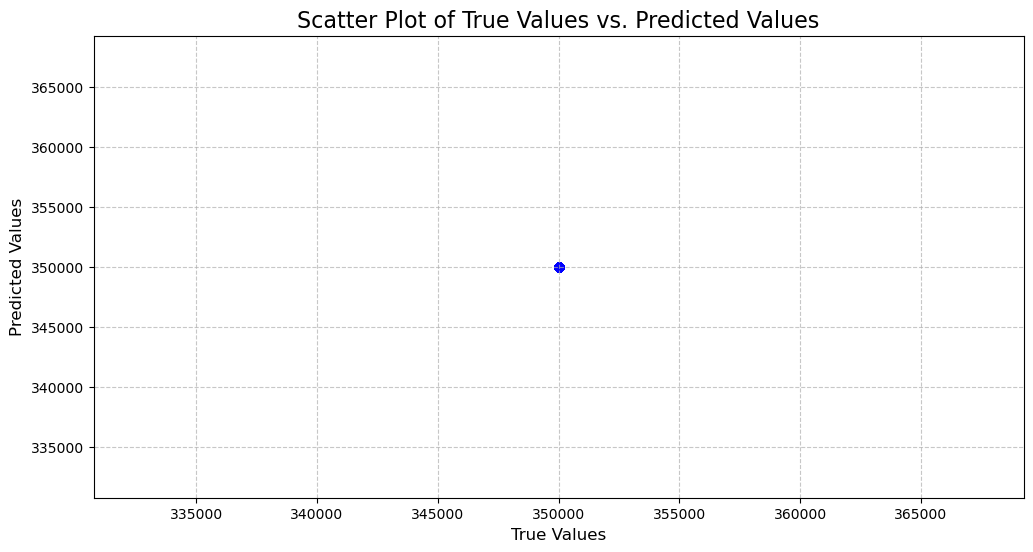

In [134]:
evaluate_model_regression(LGBMRegressor(verbose=-1), 'LGBM', X_train, y_train, X_test, y_test)

### All Model Performance Comparison

In [135]:
df_results = pd.DataFrame(evaluation_results)

In [136]:
df_results

,Model,Training Score,Testing Score
0,Linear Regression,1.0,1.0
1,SVM,1.0,1.0
2,Decision Tree,1.0,1.0
3,Random Forest,1.0,1.0
4,XG Boost,1.0,1.0
5,LGBM,1.0,1.0


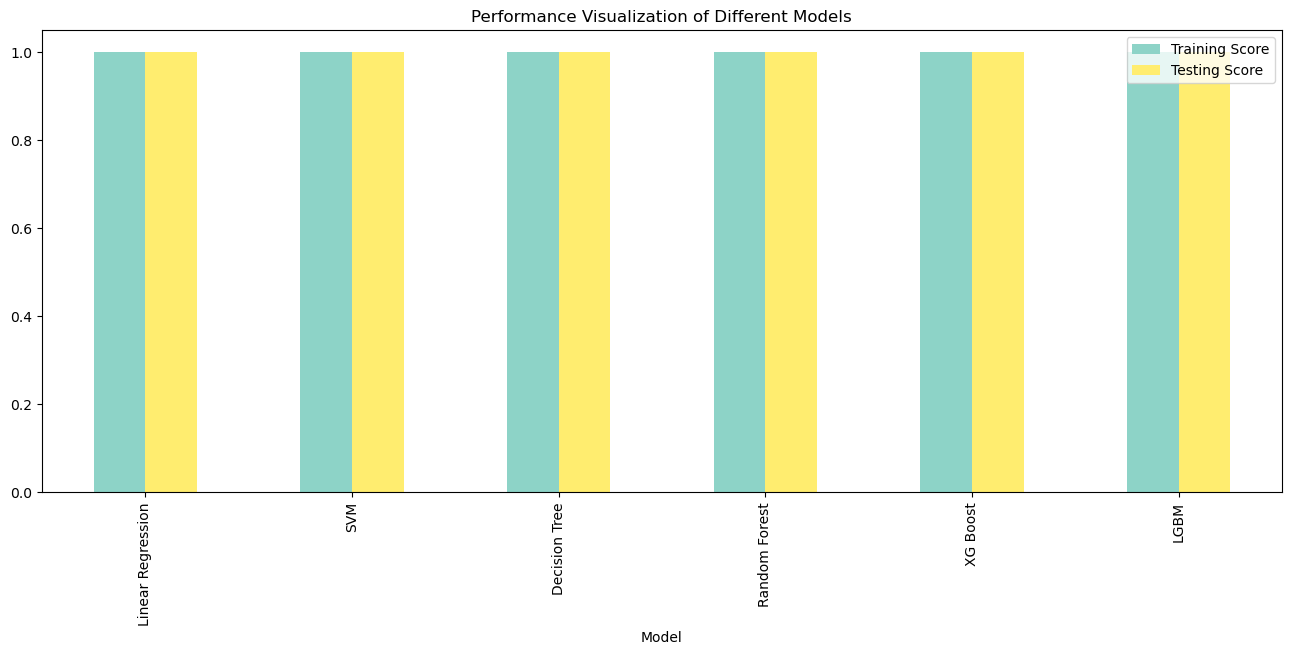

In [137]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

### Hyper-Parameter Tunning of LGBM Model

In [138]:
model1 = LGBMRegressor(verbose=-1)

In [139]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}     

In [140]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [141]:
# grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [142]:
from contextlib import redirect_stdout
with redirect_stdout(None):  # Redirect stdout to nowhere
    grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)
    grid_search1.fit(X_train, y_train.values.ravel())

# grid_search1.fit(X_train,y_train.values.ravel())

In [143]:
grid_search1.best_score_

1.0

In [144]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 100,
 'num_leaves': 16,
 'random_state': 0}

In [145]:
# Creating LGBM Model Using Best Parameters.

In [146]:
model1 = LGBMRegressor(**best_parameters1,verbose=-1)

In [147]:
model1.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.01, num_leaves=16, random_state=0, verbose=-1)

In [148]:
X_test_pred1 = model1.predict(X_test)

In [149]:
metrics.r2_score(y_test, X_test_pred1)

1.0

### Hyper-Parameter Tunning of XGBoost Model

In [150]:
model2 = XGBRegressor()

In [151]:
parameters2 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [152]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [153]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [154]:
grid_search2.best_score_

1.0

In [155]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [156]:
# Creating XGBoost Model Using Best Parameters

In [157]:
model2 = XGBRegressor(**best_parameters2)

In [158]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [159]:
X_test_pred2 = model2.predict(X_test)

In [160]:
metrics.r2_score(y_test, X_test_pred2)

1.0

### Hyper Parameter Tunning of RandomForest Model

In [161]:
model3 = RandomForestRegressor()

In [162]:
parameters3 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [163]:
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)

In [164]:
grid_search3.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [165]:
grid_search3.best_score_

1.0

In [166]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [167]:
# Creating Random Forest Model Using Best Parameters

In [168]:
model3 = RandomForestRegressor(**best_parameters3)

In [169]:
model3.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=7)

In [170]:
X_test_pred3 = model3.predict(X_test)

In [171]:
metrics.r2_score(y_test, X_test_pred3)

1.0

### Hyper Parameter Tunning of Decision Tree Model

In [172]:
model4 = DecisionTreeRegressor()

In [173]:
parameters4 = {
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6],
                'min_impurity_decrease': [0.0, 0.1, 0.2]} 

In [174]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [175]:
grid_search4.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9]})

In [176]:
grid_search4.best_score_

1.0

In [177]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 7}

In [178]:
# Creating Decision Tree Model Using Best Parameters

In [179]:
model4 =  DecisionTreeRegressor(**best_parameters4)

In [180]:
model4.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=7)

In [181]:
X_test_pred4 = model4.predict(X_test)

In [182]:
metrics.r2_score(y_test, X_test_pred4)

1.0

### Stacking Classifier Model

In [183]:
from sklearn.ensemble import StackingRegressor

In [184]:
stacking_model = StackingRegressor(estimators=[('LGBM', model1), 
                                                ("XGBoost", model2),
                                                ('RF', model3),
                                                ('DT', model4)], verbose=False)

In [185]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('LGBM',
                               LGBMRegressor(learning_rate=0.01, num_leaves=16,
                                             random_state=0, verbose=-1)),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, ga...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=7)),
                              ('DT',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=7))],
                  verbose=False)

In [186]:
X_train_pred5 = stacking_model.predict(X_train)

In [187]:
X_test_pred5 = stacking_model.predict(X_test)

In [188]:
print("Stacking Model R2 Score on Training Data is:", metrics.r2_score(y_train, X_train_pred5)*100)

Stacking Model R2 Score on Training Data is: 100.0


In [189]:
print("Stacking Model R2 Score on Testing Data is:", metrics.r2_score(y_test, X_test_pred5)*100)

Stacking Model R2 Score on Testing Data is: 100.0


### Please Upvote, Comment and Support !! 😊🚀

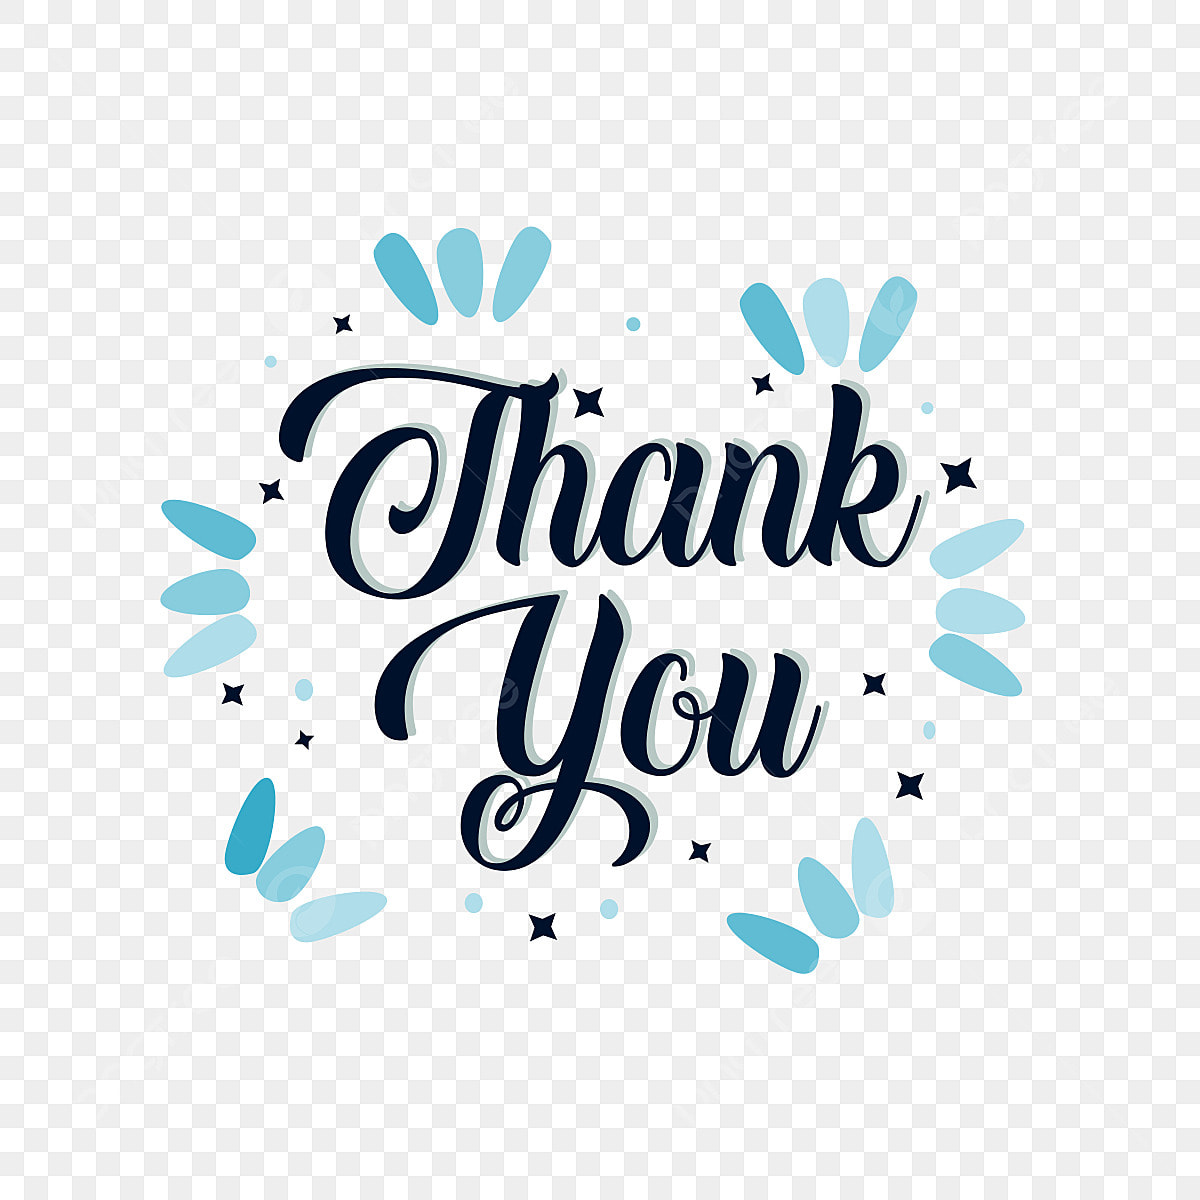